### ERA5-Land hourly data from 1950 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5-Land hourly data from 1950 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit

/opt/homebrew/Caskroom/miniforge/base/envs/EARTHKIT/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [2]:
temperature = earthkit.data.from_source(
    'cds',
    "derived-era5-pressure-levels-daily-statistics",
    {
        'product_type': 'reanalysis',
        'variable': ['temperature'],
        'year': '2023',
        'month': ['07'],
        'day': ['01'],
        'pressure_level': ['1000'],
        'daily_statistic': 'daily_mean',
        'time_zone': 'utc+00:00',
        'frequency': '1_hourly'
    },
)
datetime_for_plot = "2023-07-01 (UTC)"

#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
temperature_style = earthkit.plots.styles.Style(
    colors="turbo",
    levels=range(-40, 41, 2),
    extend="both",
    units="celsius",
)

import cartopy.crs as ccrs
crs = ccrs.NearsidePerspective(central_latitude=50)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

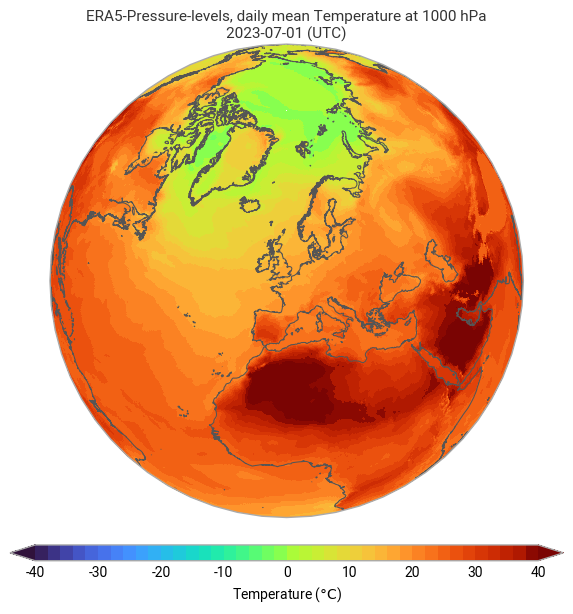

In [6]:
earthkit.plots.schema.figsize = (4, 4)

chart = earthkit.plots.Map(crs=crs)

chart.pcolormesh(temperature, style=temperature_style)

chart.coastlines(resolution="high")

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-maps metadata
# detection, which allows us to use format keys like 'variable_name'
chart.title(
    "ERA5-Pressure-levels, daily mean {variable_name} at 1000 hPa\n"+datetime_for_plot,
    # "{valid_time:%-d %B %Y} at {valid_time:%H:%M} UTC",
    fontsize=11,
)

chart.figure.save("overview-detail.png")

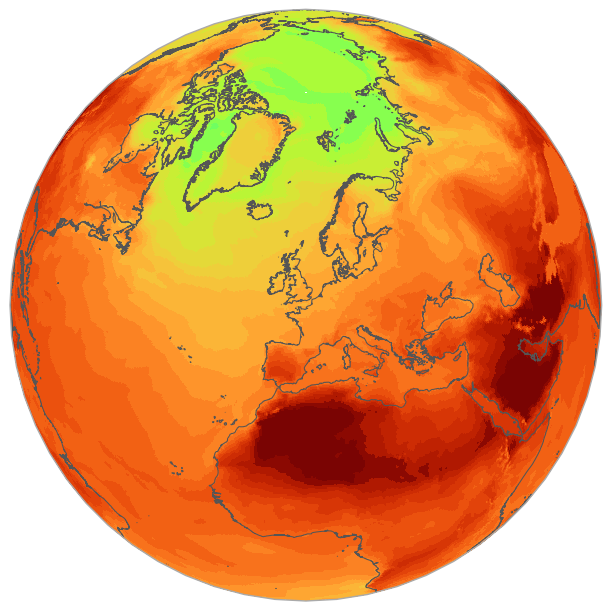

In [5]:
earthkit.plots.schema.figsize = (2, 2)
chart = earthkit.plots.Map(crs=crs)

chart.pcolormesh(temperature, style=temperature_style)

chart.coastlines(resolution="high")

chart.figure.save("overview.png")